In [2]:
# jika tidak bisa load packages "plspm" silakan gunakan instruksi dibawah
# install "devtools"
# install.packages("devtools") 
# library(devtools)
# install "plspm"
# install_github("gastonstat/plspm")

In [3]:
library("plspm")

In [4]:
data(satisfaction)

## Model konseptual "European Customer Satisfaction Index (ECSI) model"
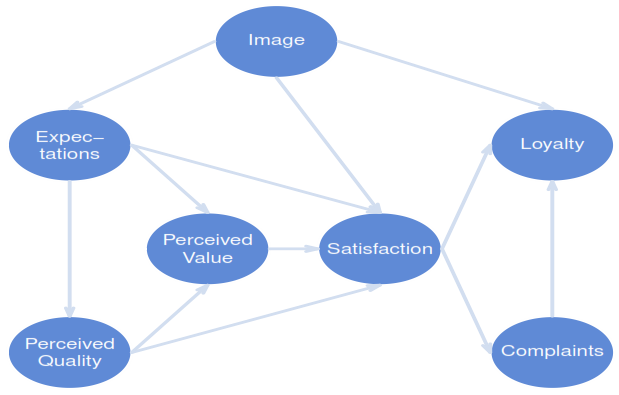

In [5]:
# inner model
IMAG <- c(0,0,0,0,0,0)
EXPE <- c(1,0,0,0,0,0)
QUAL <- c(0,1,0,0,0,0)
VAL <- c(0,1,1,0,0,0)
SAT <- c(1,1,1,1,0,0) 
LOY <- c(1,0,0,0,1,0)
sat_path <- rbind(IMAG, EXPE, QUAL, VAL, SAT, LOY)

In [6]:
# define list of blocks (outer model)
sat_blocks <- list(1:5, 6:10, 11:15, 16:19, 20:23, 24:27)

In [7]:
# vector of modes (reflective indicators)
sat_modes <- rep("A", 6) 

In [8]:
# apply plspm with bootstrap validation
satpls <- plspm(satisfaction, sat_path, sat_blocks, modes = sat_modes, 
               scaled = FALSE, boot.val = TRUE)

In [9]:
# default print
satpls

Partial Least Squares Path Modeling (PLS-PM) 
---------------------------------------------
   NAME             DESCRIPTION
1  $outer_model     outer model
2  $inner_model     inner model
3  $path_coefs      path coefficients matrix
4  $scores          latent variable scores
5  $crossloadings   cross-loadings
6  $inner_summary   summary inner model
7  $effects         total effects
8  $unidim          unidimensionality
9  $gof             goodness-of-fit
10 $boot            bootstrap results
11 $data            data matrix
---------------------------------------------
You can also use the function 'summary' 


In [10]:
# summary of results
summary(satpls)

PARTIAL LEAST SQUARES PATH MODELING (PLS-PM) 

---------------------------------------------------------- 
MODEL SPECIFICATION 
1   Number of Cases      250 
2   Latent Variables     6 
3   Manifest Variables   27 
4   Scale of Data        Raw Data 
5   Non-Metric PLS       FALSE 
6   Weighting Scheme     centroid 
7   Tolerance Crit       1e-06 
8   Max Num Iters        100 
9   Convergence Iters    4 
10  Bootstrapping        TRUE 
11  Bootstrap samples    100 

---------------------------------------------------------- 
BLOCKS DEFINITION 
    Block         Type   Size   Mode
1    IMAG    Exogenous      5      A
2    EXPE   Endogenous      5      A
3    QUAL   Endogenous      5      A
4     VAL   Endogenous      4      A
5     SAT   Endogenous      4      A
6     LOY   Endogenous      4      A

---------------------------------------------------------- 
BLOCKS UNIDIMENSIONALITY 
      Mode  MVs  C.alpha  DG.rho  eig.1st  eig.2nd
IMAG     A    5    0.830   0.882     3.02    0.778
EXPE

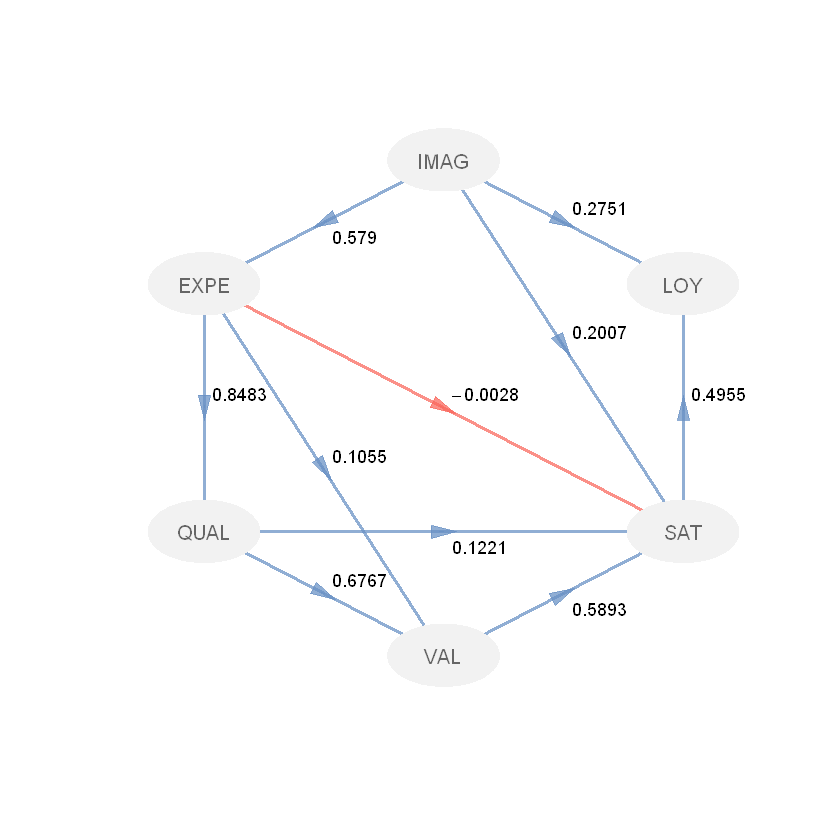

In [11]:
# plot inner model results
plot(satpls, what = "inner")

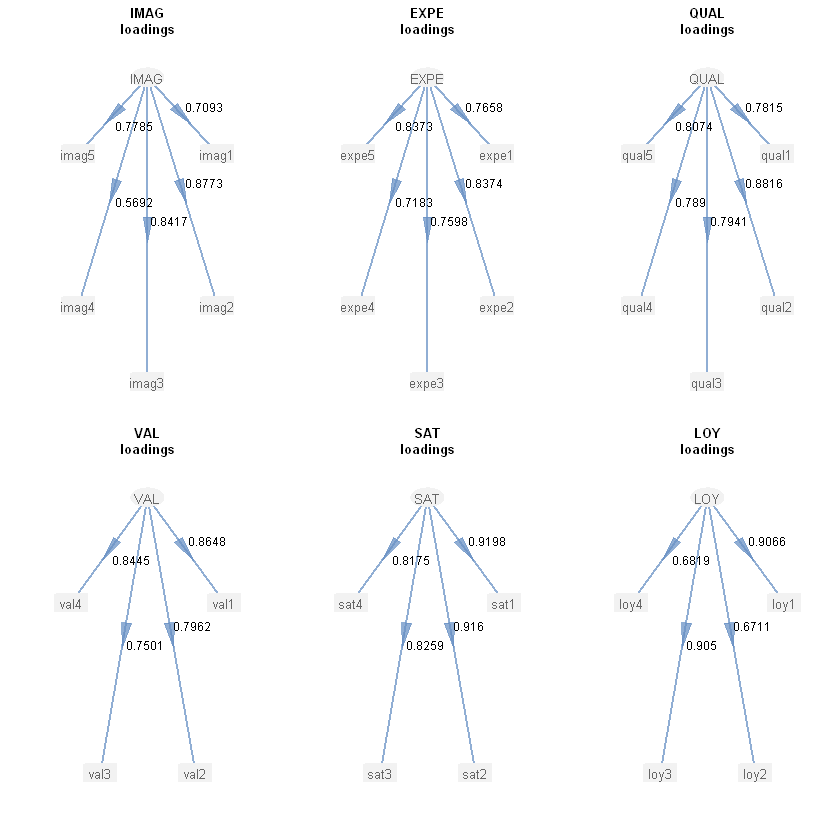

In [12]:
# plot outer model loadings
plot(satpls, what = "loadings")

In [13]:
# plot outer model weights
# plot(satpls, what = "weights") plot pembobot

### Interpretasi 

In [14]:
# 1.Outer Model
satpls$outer_model
# Perhatikan nilai loading, jika > 0,5 maka dikatakan valid
# hasil dibawah menunjukkan bahwa semua indikator yang merepresentasikan variabel laten adalah valid

,name,block,weight,loading,communality,redundancy
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,imag1,IMAG,0.09824185,0.7093265,0.5031441,0.0000000
2,imag2,IMAG,0.15747286,0.8773078,0.7696690,0.0000000
3,imag3,IMAG,0.15672212,0.8417485,0.7085406,0.0000000
4,imag4,IMAG,0.07657586,0.5691934,0.3239812,0.0000000
5,imag5,IMAG,0.18433024,0.7784668,0.6060106,0.0000000
6,expe1,EXPE,0.10623016,0.7658006,0.5864505,0.1965745
7,expe2,EXPE,0.14069312,0.8374190,0.7012706,0.2350615
8,expe3,EXPE,0.11878317,0.7598206,0.5773273,0.1935165
9,expe4,EXPE,0.09945148,0.7183452,0.5160199,0.1729666


Didalam SEM PLS, signifikansi pengujian outer model dan inner model ada pada hasil bootstrap.
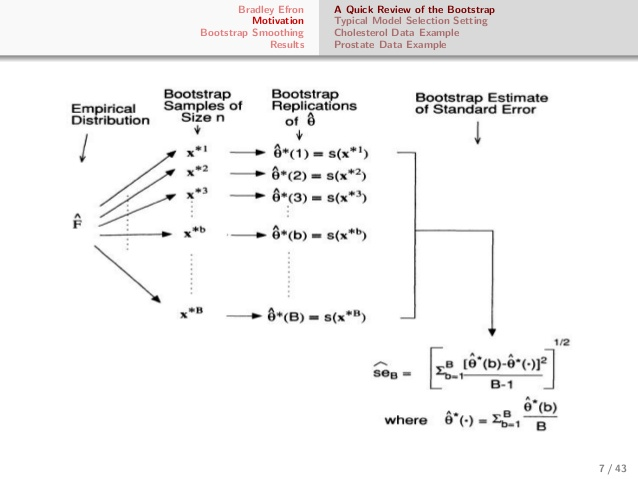

In [17]:
satpls$crossloadings # dapat digunakan juga untuk menginterpretasi validitas indikator / manifest
# cara interpretasi
#nilai loading imag1-imag5 memiliki nilai loading yang lebih besar dalam merepresentasikan variabel latennya yaitu IMAG
#daripada di variabel laten lainnya.sehingga dikatakan imag1-imag5 valid.

,name,block,IMAG,EXPE,QUAL,VAL,SAT,LOY
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,imag1,IMAG,0.7093265,0.3137113,0.3129794,0.4248305,0.3943063,0.3972333
2,imag2,IMAG,0.8773078,0.4804046,0.5335036,0.6081172,0.5971959,0.5436739
3,imag3,IMAG,0.8417485,0.4774542,0.5153348,0.6627121,0.6456500,0.5553473
4,imag4,IMAG,0.5691934,0.2703046,0.3131869,0.4056215,0.3457062,0.3471404
5,imag5,IMAG,0.7784668,0.5322199,0.5894579,0.5389461,0.5557121,0.4743962
6,expe1,EXPE,0.4017939,0.7658006,0.6312760,0.4997762,0.4629342,0.3625494
7,expe2,EXPE,0.5106546,0.8374190,0.7489412,0.5905133,0.5469549,0.4201303
8,expe3,EXPE,0.4061334,0.7598206,0.6269420,0.4785646,0.4146134,0.3229620
9,expe4,EXPE,0.4917015,0.7183452,0.6205234,0.5609691,0.5090989,0.4456616


In [16]:
# Signifikansi Outer Model pada bootstrap --> default : Bootstrap samples = 100
satpls$boot$loadings
# dari nilai persentil diketahui tidak terdapat selang kepercayaan yang melewati nilai 0, sehingga dikatakan nilai loading signifikan
# kesimpulan untuk indikator valid dan signifikan

,Original,Mean.Boot,Std.Error,perc.025,perc.975
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IMAG-imag1,0.7093265,0.7127053,0.06034534,0.5779220,0.8056499
IMAG-imag2,0.8773078,0.8779853,0.02743296,0.8205582,0.9192270
IMAG-imag3,0.8417485,0.8397795,0.03042897,0.7835695,0.8888798
IMAG-imag4,0.5691934,0.5734410,0.07157876,0.4127252,0.6895954
IMAG-imag5,0.7784668,0.7772726,0.03616910,0.7034125,0.8432811
EXPE-expe1,0.7658006,0.7658088,0.04429094,0.6645082,0.8239787
EXPE-expe2,0.8374190,0.8386957,0.02503072,0.7887874,0.8844451
EXPE-expe3,0.7598206,0.7550140,0.04683202,0.6561513,0.8279788
EXPE-expe4,0.7183452,0.7139729,0.05327906,0.6006128,0.8069886


In [18]:
# Reliabilitas
satpls$unidim
# Diketahui alpha cronbach > 0,7, sehingga dikatakan reliabel

,Mode,MVs,C.alpha,DG.rho,eig.1st,eig.2nd
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
IMAG,A,5,0.8302267,0.8822033,3.017810,0.7776358
EXPE,A,5,0.8465841,0.8908554,3.102314,0.6105467
QUAL,A,5,0.8713250,0.9068997,3.305987,0.5677773
VAL,A,4,0.8357228,0.8904442,2.681531,0.6006842
SAT,A,4,0.8940109,0.9267006,3.039999,0.4220001
LOY,A,4,0.8194216,0.8813711,2.604721,0.5734549


In [19]:
# 2. Signifikansi Inner Model / Signifikansi antar variabel laten
satpls$boot$paths
# model matematis sesuai dengan banyaknya variabel laten yang ditunjuk
# Signifikan dilihat pada nilai percentil...jika melewati 0 maka tidak ada pengaruh / tidak signifikan
# nilai estimasi antar variabel laten tercermin dari nilai bootstrap Mean.Boot

,Original,Mean.Boot,Std.Error,perc.025,perc.975
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IMAG -> EXPE,0.578959128,0.571857233,0.05463877,0.45361414,0.6590229
IMAG -> SAT,0.200724200,0.192337322,0.05409601,0.10269298,0.3152613
IMAG -> LOY,0.275149576,0.266828802,0.06931605,0.13223312,0.3847470
EXPE -> QUAL,0.848344408,0.847555854,0.02067501,0.81003048,0.8846584
EXPE -> VAL,0.105477650,0.105812915,0.07338943,-0.02545702,0.2438622
EXPE -> SAT,-0.002753995,-0.007163207,0.07236367,-0.15972427,0.1283748
QUAL -> VAL,0.676655529,0.671127791,0.07816683,0.51407575,0.8366629
QUAL -> SAT,0.122144566,0.128551985,0.09114582,-0.02127549,0.3103346
VAL -> SAT,0.589330650,0.595711790,0.08976175,0.39761684,0.7515094


In [20]:
# Kebaikan Model overal
satpls$gof

[1] 0.6097416

In [21]:
satpls$boot$rsq
# kebaikan model parsial setiap variabel laten

,Original,Mean.Boot,Std.Error,perc.025,perc.975
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EXPE,0.3351937,0.3299762,0.06108759,0.2057687,0.4343800
QUAL,0.7196882,0.7187741,0.03502408,0.6561502,0.7826252
VAL,0.5900844,0.5851064,0.06107014,0.4755196,0.6985713
SAT,0.7073209,0.7140832,0.03572657,0.6492417,0.7799100
LOY,0.5099226,0.5156106,0.05844487,0.3944899,0.6159041


### Catatan
Pemilihan Bootstrap dapat dicoba dari 50,100,150,200,250,300,350,400,450,500
Cara evaluasi bootstrap mana yang dipilih, maka pada setiap hasil boostrap dalam inner model silakan hitung absolut deviasi atau selisih antara Original dengan Mean.Boot. Kemudian cari rata"nya dan bandingkan dengan nilai bootstrap lainnya.
Pilih rata" terkecilnya, untuk menentukan bootstrap terpilih

### Silakan latihan dengan data layanan nasabah sebelumnya